In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil import tz
import statsmodels.api as sm

In [35]:
# raw = pd.read_csv("ganedago_noagg.csv")
raw = pd.read_csv("ganedago_hourlyagg.csv")
raw

,name,slottime_GMT,slottype,slotavg,pointTitle
0,GanedagoHall.Elec.PowerScout3037/kW,2023-03-07 15:00:00,H,44.825,Building Electric
1,GanedagoHall.Solar.Elec.PowerScout3037/kW,2023-03-07 15:00:00,H,61.050,Solar Generation meter
2,GanedagoHall.Elec.PowerScout3037/kW,2023-03-07 16:00:00,H,29.625,Building Electric
3,GanedagoHall.Solar.Elec.PowerScout3037/kW,2023-03-07 16:00:00,H,76.050,Solar Generation meter
4,GanedagoHall.Elec.PowerScout3037/kW,2023-03-07 17:00:00,H,35.200,Building Electric
...,...,...,...,...,...
1495,GanedagoHall.Solar.Elec.PowerScout3037/kW,2023-04-07 18:00:00,H,145.950,Solar Generation meter
1496,GanedagoHall.Elec.PowerScout3037/kW,2023-04-07 19:00:00,H,19.350,Building Electric
1497,GanedagoHall.Solar.Elec.PowerScout3037/kW,2023-04-07 19:00:00,H,103.500,Solar Generation meter
1498,GanedagoHall.Elec.PowerScout3037/kW,2023-04-07 20:00:00,H,48.725,Building Electric


In [36]:
weather = pd.read_csv("ganedago_weather.csv")
weather

,time,temperature_2m (°F),precipitation (inch),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²)
0,2023-03-06T00:00,37.0,0.0,29.0,28.0,6.0,0.0,0.0,0.0,0.0,0.0
1,2023-03-06T01:00,36.7,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023-03-06T02:00,36.0,0.0,10.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023-03-06T03:00,35.3,0.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023-03-06T04:00,34.6,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
787,2023-04-07T19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
788,2023-04-07T20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
789,2023-04-07T21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
790,2023-04-07T22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
weather["time"] = weather["time"].apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M").strftime("%Y-%m-%d %H:%M:%S"))
weather

,time,temperature_2m (°F),precipitation (inch),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²)
0,2023-03-06 00:00:00,37.0,0.0,29.0,28.0,6.0,0.0,0.0,0.0,0.0,0.0
1,2023-03-06 01:00:00,36.7,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023-03-06 02:00:00,36.0,0.0,10.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023-03-06 03:00:00,35.3,0.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023-03-06 04:00:00,34.6,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
787,2023-04-07 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
788,2023-04-07 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
789,2023-04-07 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
790,2023-04-07 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
grid = raw[["slottime_GMT", "slotavg"]][raw["pointTitle"] == "Building Electric"]
grid.columns = ["time", "grid"]
grid = grid.set_index("time")
display(grid)

solar = raw[["slottime_GMT", "slotavg"]][raw["pointTitle"] == "Solar Generation meter"]
solar.columns = ["time", "solar"]
solar = solar.set_index("time")
display(solar)

,grid
time,
2023-03-07 15:00:00,44.825
2023-03-07 16:00:00,29.625
2023-03-07 17:00:00,35.200
2023-03-07 18:00:00,67.300
2023-03-07 19:00:00,94.900
...,...
2023-04-07 16:00:00,68.600
2023-04-07 17:00:00,62.200
2023-04-07 18:00:00,45.250


,solar
time,
2023-03-07 15:00:00,61.050
2023-03-07 16:00:00,76.050
2023-03-07 17:00:00,89.050
2023-03-07 18:00:00,50.325
2023-03-07 19:00:00,30.375
...,...
2023-04-07 16:00:00,163.100
2023-04-07 17:00:00,174.550
2023-04-07 18:00:00,145.950


In [39]:
df = grid.join(solar, on="time", how="inner").reset_index()
# df = pd.concat([grid, solar], axis=1, join="inner").reset_index()
# df.to_csv("ganedago_hourlyagg_processed.csv")
df

,time,grid,solar
0,2023-03-07 15:00:00,44.825,61.050
1,2023-03-07 16:00:00,29.625,76.050
2,2023-03-07 17:00:00,35.200,89.050
3,2023-03-07 18:00:00,67.300,50.325
4,2023-03-07 19:00:00,94.900,30.375
...,...,...,...
745,2023-04-07 16:00:00,68.600,163.100
746,2023-04-07 17:00:00,62.200,174.550
747,2023-04-07 18:00:00,45.250,145.950
748,2023-04-07 19:00:00,19.350,103.500


In [40]:
weather = weather.set_index("time")
df = df.join(weather, on="time", how="inner").reset_index()
df

,index,time,grid,solar,temperature_2m (°F),precipitation (inch),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²)
0,0,2023-03-07 15:00:00,44.825,61.050,28.2,0.0,82.0,89.0,0.0,5.0,155.0,4.0,151.0,1.9
1,1,2023-03-07 16:00:00,29.625,76.050,28.5,0.0,100.0,100.0,12.0,12.0,213.0,19.0,194.0,20.1
2,2,2023-03-07 17:00:00,35.200,89.050,28.8,0.0,99.0,100.0,10.0,9.0,247.0,18.0,229.0,30.1
3,3,2023-03-07 18:00:00,67.300,50.325,29.1,0.0,90.0,100.0,0.0,0.0,246.0,29.0,217.0,35.0
4,4,2023-03-07 19:00:00,94.900,30.375,31.5,0.0,100.0,100.0,21.0,0.0,244.0,27.0,217.0,45.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,745,2023-04-07 16:00:00,68.600,163.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
746,746,2023-04-07 17:00:00,62.200,174.550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
747,747,2023-04-07 18:00:00,45.250,145.950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
748,748,2023-04-07 19:00:00,19.350,103.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df["hour"] = df["time"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").replace(tzinfo=tz.tzutc()).astimezone(tz.tzlocal()).hour)
df["time"] = df["time"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").replace(tzinfo=tz.tzutc()).astimezone(tz.tzlocal()))
df = df.dropna()

In [42]:
grouped = df.groupby("hour").mean().reset_index()
grouped

,hour,index,grid,solar,temperature_2m (°F),precipitation (inch),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²)
0,0,289.208333,134.076042,0.000000,33.841667,0.003167,59.083333,40.791667,39.083333,36.166667,0.000000,0.000000,0.000000,0.000000
1,1,290.208333,124.917708,0.000000,33.275000,0.002500,61.166667,41.333333,40.291667,39.250000,0.000000,0.000000,0.000000,0.000000
2,2,299.000000,113.484783,0.000000,33.030435,0.001739,60.478261,41.000000,43.608696,37.347826,0.000000,0.000000,0.000000,0.000000
3,3,292.166667,106.358333,0.000000,32.575000,0.002000,61.833333,39.833333,44.166667,38.791667,0.000000,0.000000,0.000000,0.000000
4,4,293.166667,102.186458,0.000000,32.258333,0.003125,64.458333,45.708333,43.625000,37.750000,0.000000,0.000000,0.000000,0.000000
5,5,294.166667,99.843750,0.000000,31.833333,0.005250,66.250000,46.750000,42.250000,39.875000,0.000000,0.000000,0.000000,0.000000
6,6,295.166667,108.786458,0.043750,31.875000,0.004292,68.625000,47.125000,44.750000,35.458333,0.000000,0.000000,0.000000,0.000000
7,7,296.166667,107.790625,2.825000,32.054167,0.005583,67.458333,47.541667,43.708333,34.500000,0.833333,0.041667,0.791667,0.000000
8,8,297.166667,97.216667,16.940625,32.479167,0.005250,66.625000,46.541667,41.791667,38.791667,32.541667,9.958333,22.583333,5.654167
9,9,298.166667,75.933333,40.608333,34.308333,0.006292,66.541667,49.541667,44.500000,42.083333,129.041667,49.791667,79.250000,153.320833


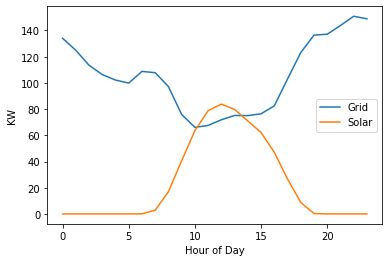

In [43]:
plt.plot(grouped["hour"], grouped["grid"])
plt.plot(grouped["hour"], grouped["solar"])
plt.xlabel("Hour of Day")
plt.ylabel("KW")
plt.legend(["Grid", "Solar"])

Series([], Name: cloudcover (%), dtype: float64)

0      44.545810
1      29.146311
2      30.001838
3      37.701588
4      29.146311
         ...    
578    37.701588
579    29.146311
580    29.146311
581    29.146311
582    29.146311
Length: 248, dtype: float64


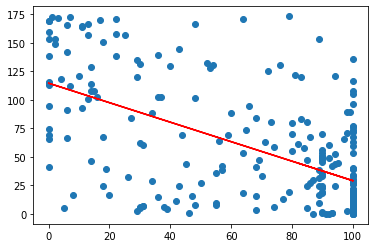

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  solar   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     129.1
Date:                Mon, 10 Apr 2023   Prob (F-statistic):           2.49e-24
Time:                        19:58:55   Log-Likelihood:                -1280.4
No. Observations:                 248   AIC:                             2565.
Df Residuals:                     246   BIC:                             2572.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            114.6991      5.729     20.022      0.000     103.416     125.982
cloudcover (%)    -0.8555      0.075    -11.363      0.000      -1.004      -0.707
==============================================================================
Omnibus:                        4.331   Durbin-Watson:                   0.555
Prob(Omnibus):                  0.115   Jarque-Bera (JB):                4.227
Skew:                           0.320   Prob(JB):                        0.121
Kurtosis:                       3.006   Cond. No.                         162.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
daylight = df[(df["hour"] > 7) & (df["hour"] < 18)]

X = daylight["cloudcover (%)"]
Y = daylight["solar"]

# plt.scatter(X, Y)

display(X[X.isna()])

X = sm.add_constant(X)
model_q1 = sm.OLS(Y, X).fit()
predictions = model_q1.predict(X)
print(predictions)

plt.scatter(X["cloudcover (%)"], Y)
plt.plot(X["cloudcover (%)"], predictions, c="red")
plt.show()

model_q1.summary()